In [ ]:
#1. Предобработать данные (пропуски, замена текста, дубликаты и т.д)
#2. Использовать для классификации sklearn.ensemble.RandomForestClassifier
#3. Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)
#4. Провести кроссвалидацию модели
#5. Оценить метрики бинарной классификации (Precision, recall, f1)
#6. Построить ROC-кривую для оценки качества классификатора

In [820]:
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
titanic_df = pd.read_csv('titanicdf.csv')
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score 


In [821]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [822]:
titanic_df[titanic_df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [823]:
titanic_df = titanic_df[titanic_df['Embarked'].notna()] 

In [824]:
titanic_df[['Survived','Pclass','Age','Fare']].head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [825]:
titanic_df[titanic_df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [826]:
titanic_df.fillna(titanic_df.Age.median(),inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [827]:
titanic_df.Survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [828]:
titanic_df.Pclass.value_counts(normalize=True)

3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64

In [829]:
titanic_df.Sex.value_counts(normalize=True)

male      0.649044
female    0.350956
Name: Sex, dtype: float64

In [830]:
titanic_df.SibSp.value_counts(normalize=True)

0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: SibSp, dtype: float64

In [831]:
titanic_df.Parch.value_counts(normalize=True)

0    0.760405
1    0.132733
2    0.089989
3    0.005624
5    0.005624
4    0.004499
6    0.001125
Name: Parch, dtype: float64

In [832]:
titanic_df.Cabin.value_counts(normalize=True)

28.0           0.772778
G6             0.004499
C23 C25 C27    0.004499
B96 B98        0.004499
E101           0.003375
                 ...   
C95            0.001125
C99            0.001125
C82            0.001125
A20            0.001125
A7             0.001125
Name: Cabin, Length: 147, dtype: float64

In [833]:
titanic_df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [834]:
for col in titanic_df.columns:
    print(col, round(titanic_df[col].isna().sum() / titanic_df.shape[0] *100,2))

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 0.0
Embarked 0.0


In [835]:
new_titanic=titanic_df.fillna(titanic_df.Age.median(),inplace = True) # 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [836]:
new_titanic

In [837]:
df = pd.get_dummies(data=titanic_df, columns=['Pclass', 'Sex','Embarked'])

In [838]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,28.0,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,28.0,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,28.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,28.0,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,28.0,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


In [839]:
df.duplicated().sum()# Проверяем на дупликаты. Если есть тогда удаляем через функцию drop_duplicates 

0

In [923]:
def check_age_for_molodezh(df): #Разбил возраст на трудоспособное население в соответствии законодательства РФ
    if df.Age >= 16 and df.Age <=60 :
        return 1
    else:
        return 0

In [924]:
df['youth'] = df.apply(check_age_for_molodezh,axis=1)

In [925]:
new_df = df[['Survived', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'youth']]

In [926]:
new_df.fillna(new_df.youth.median(),inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [927]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Survived',axis=1), new_df['Survived'], test_size=0.25, random_state=42)

In [928]:
new_df

,Survived,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,youth
0,0,7.2500,0,0,1,0,1,0,0,1,1
1,1,71.2833,1,0,0,1,0,1,0,0,1
2,1,7.9250,0,0,1,1,0,0,0,1,1
3,1,53.1000,1,0,0,1,0,0,0,1,1
4,0,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,0,1,0,0,1,0,0,1,1
887,1,30.0000,1,0,0,1,0,0,0,1,1
888,0,23.4500,0,0,1,1,0,0,0,1,1
889,1,30.0000,1,0,0,0,1,1,0,0,1


In [929]:
reg=RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=28, min_samples_split=2, 
                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                              min_impurity_split=None, bootstrap=True, oob_score=False, 
                                              n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
#n_estimatorsint, по умолчанию = 100? Количество деревьев в лесу 
# criterion ункция измерения качества раскола? по умолчанию = «джини»
# max_depth  по умолчанию = None? Максимальная глубина дерева.
reg.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', max_depth=28, n_estimators=10)

In [930]:
pred = reg.predict(X_test)

In [931]:
clf = tree.DecisionTreeClassifier()

In [932]:
model = clf.fit(X_train, y_train)

In [933]:
pred = model.predict(X_test)

In [934]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Accuracy: 0.7937219730941704
Precision: 0.7142857142857143
Recall: 0.7317073170731707
F1: 0.7228915662650603


In [935]:
# Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)
N=[10,30,100]
crit=['gini','entropy']
test_deep = []
for deep in range (1,31):
    for leaf in  N:
        for kr in  krit:
            clf = RandomForestClassifier(max_depth=deep, n_estimators=leaf, criterion=kr)
            model = clf.fit(X_train, y_train)
            pred = model.predict(X_test)
            test_deep.append([deep,leaf,kr,f1_score(y_test,pred),recall_score(y_test,pred)])

In [936]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['max_depth','n_estimators', 'criterion','f1_score','recall_score']

In [937]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,max_depth,n_estimators,criterion,f1_score,recall_score
43,8,10,entropy,0.757764,0.743902
85,15,10,entropy,0.756098,0.756098
93,16,30,entropy,0.754491,0.768293
98,17,30,gini,0.752941,0.780488
68,12,30,gini,0.750000,0.768293
91,16,10,entropy,0.748466,0.743902
162,28,10,gini,0.748466,0.743902
109,19,10,entropy,0.746988,0.756098
126,22,10,gini,0.746988,0.756098
128,22,30,gini,0.746988,0.756098


In [938]:
#кроссвалидация модели
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(reg, X_train, y_train, cv=cv, scoring='recall')

In [939]:
scores

array([0.78409091, 0.71428571, 0.72619048, 0.69411765, 0.69767442,
       0.725     , 0.64285714, 0.74725275, 0.78378378, 0.66233766])

In [940]:
scores.mean()

0.717759050146191

ROC-AUC

In [941]:
pred_reg = model.predict_proba(X_test)[:,1]

In [942]:
fpr, tpr, treshold = roc_curve(y_test, pred_reg)
tree_auc = roc_auc_score(y_test, pred_reg)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.828


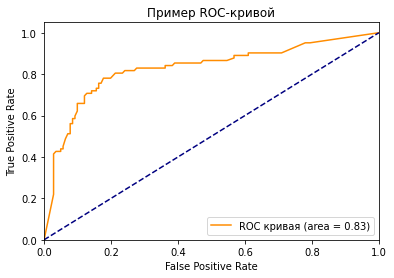

In [943]:
roc_auc = auc(fpr, tpr)
# строим график, кривая находится над прямой, это хорошо! чем более выпуклая, тем качественнее имодель и расстояние под прямой  это площадь roc_auc, в идеале площадь равна 1 
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()